   price  speed   hd  ram  screen  cd multi premium  ads  trend
1   1499     25   80    4      14  no    no     yes   94      1
2   1795     33   85    2      14  no    no     yes   94      1
3   1595     25  170    4      15  no    no     yes   94      1
4   1849     25  170    8      14  no    no      no   94      1
5   3295     33  340   16      14  no    no     yes   94      1
          price     speed       ram        hd
price  1.000000  0.300976  0.622748  0.430258
speed  0.300976  1.000000  0.234760  0.372304
ram    0.622748  0.234760  1.000000  0.777726
hd     0.430258  0.372304  0.777726  1.000000


<AxesSubplot:xlabel='ram', ylabel='price'>

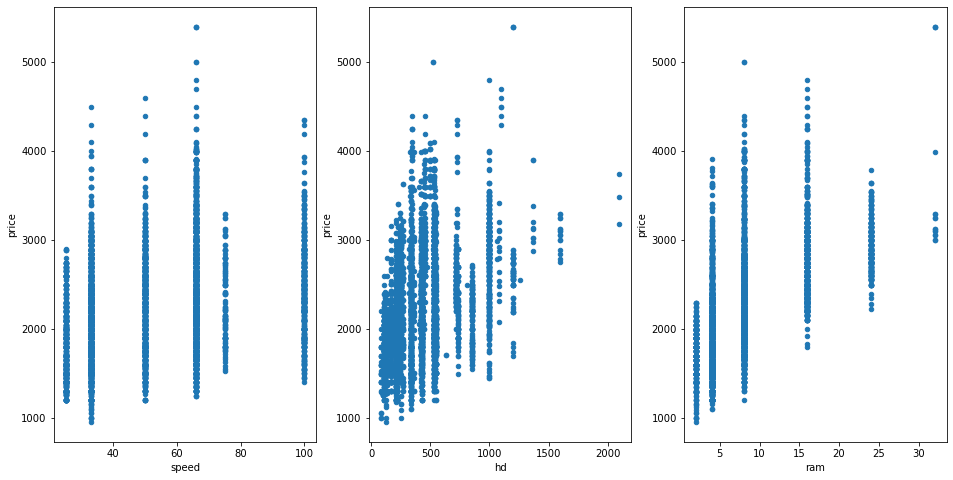

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import train_test_split

df = pd.read_csv('computers.csv')
print(df.head())
print(df[['price', 'speed', 'ram', 'hd']].corr())
fig, axs = plt.subplots(1,3, figsize = (16,8))
df.plot(kind='scatter', x = 'speed', y = 'price', ax = axs[0])
df.plot(kind='scatter', x = 'hd', y = 'price', ax = axs[1])
df.plot(kind='scatter', x = 'ram', y = 'price', ax = axs[2])

intercept [1687.2925367]
coefficent [[64.23162668]]
predicted
 [[1815.75579006]
 [3742.70459056]]


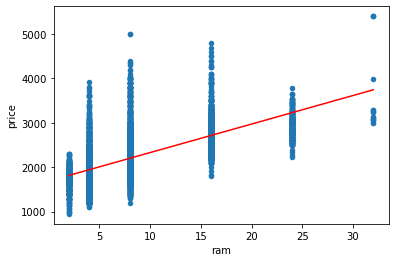

In [32]:
#univaritive
x = np.array(df[['ram']])
y = np.array(df[['price']])
model = linear_model.LinearRegression()
model.fit(x, y)
print("intercept", model.intercept_)
print("coefficent", model.coef_)
x_new = pd.DataFrame({'ram':[df.ram.min(),df.ram.max()]})
predicted = model.predict(x_new)
print("predicted\n", predicted)
df.plot(kind="scatter", x = 'ram', y = 'price')
plt.plot(x_new, predicted, c = 'red')

In [33]:
#multivaritive
import math
x = df[['speed', 'ram', 'hd']]
y = df['price']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.3, random_state=100)
model = linear_model.LinearRegression()
model.fit(xtrain, ytrain)
print("intercept", model.intercept_)
print("coefficent", model.coef_)
predicted = model.predict(xtest)
print(metrics.mean_squared_error(ytest, predicted))
r2 = model.score(xtest, ytest)
print("accuracy", r2)

intercept 1494.3905423348178
coefficent [ 5.65661508 77.22422905 -0.50794468]
190939.12627186894
accuracy 0.43699493968884084
